In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
#pull data for nation dist price
fuel_csv1 = Path("Resources/Fuel pricing/Average DIST price.csv")
fuel_pricingdata = pd.read_csv(fuel_csv1, usecols=['Year', 'National'], skiprows=[0])
fuel_pricingdata = fuel_pricingdata.rename(columns={"National": "National Diesel Pump Price"})
#drop NAN                                         
fuel_pricingdata = fuel_pricingdata.dropna()
fuel_pricingdata

,Year,National Diesel Pump Price
0,2007,131.3
1,2008,161.6
2,2009,122.5
3,2010,130.1
4,2011,148.5
5,2012,150.6
6,2013,154.3
7,2014,156.8
8,2015,130.4
9,2016,118.5


In [3]:
                                                
# Convert 'Year' column to numeric data type
fuel_pricingdata['Year'] = pd.to_numeric(fuel_pricingdata['Year'], errors='coerce')
fuel_pricingdata

,Year,National Diesel Pump Price
0,2007,131.3
1,2008,161.6
2,2009,122.5
3,2010,130.1
4,2011,148.5
5,2012,150.6
6,2013,154.3
7,2014,156.8
8,2015,130.4
9,2016,118.5


In [4]:
#createing loop
results = []

# Create a loop to calculate the difference between the national diesel pump price of the current year and the previous year
for i in range(1, len(fuel_pricingdata)):
    current_year = fuel_pricingdata['Year'].iloc[i]
    previous_year = fuel_pricingdata['Year'].iloc[i-1]
    current_year_price = fuel_pricingdata['National Diesel Pump Price'].iloc[i]
    previous_year_price = fuel_pricingdata['National Diesel Pump Price'].iloc[i-1]
    difference = current_year_price - previous_year_price
    
    # Append the result to the list
    results.append({'Year': current_year, 'Dist Difference': difference})

# Convert the list into a DataFrame
df_dist = pd.DataFrame(results)

# Print the DataFrame
print(df_dist)

    Year  Dist Difference
0   2008             30.3
1   2009            -39.1
2   2010              7.6
3   2011             18.4
4   2012              2.1
5   2013              3.7
6   2014              2.5
7   2015            -26.4
8   2016            -11.9
9   2017             11.1
10  2018             20.2
11  2019             -1.8
12  2020            -21.1
13  2021             16.1
14  2022             64.5


In [5]:
#pull data for national petrol price 
fuel_csv3 = Path("Resources/spendings/Consumer Price Index and selected components.csv")
fuel_csv3
fuel_petroldata = pd.read_csv(fuel_csv3,usecols=['X.1','PETROL'],skiprows=[])
fuel_petroldata =fuel_petroldata.rename(columns={"X.1": "Month/year"
                                         })
fuel_petroldata=fuel_petroldata.dropna()
fuel_petroldata

,Month/year,PETROL
0,Dec-11,98.8
1,Mar-12,101.2
2,Jun-12,101.9
3,Sep-12,97.9
4,Dec-12,100.4
5,Mar-13,101.6
6,Jun-13,98.5
7,Sep-13,106.0
8,Dec-13,104.8
9,Mar-14,109.1


In [6]:
# Convert 'PETROL' column to numeric data type
fuel_petroldata['PETROL'] = pd.to_numeric(fuel_petroldata['PETROL'], errors='coerce')

# Extract the year from 'Month/year' column
fuel_petroldata['Year'] = pd.to_datetime(fuel_petroldata['Month/year'], format='%b-%y').dt.year

# Group by 'Year' and calculate the average petrol prices per year
average_petrol_prices = fuel_petroldata.groupby('Year')['PETROL'].mean()

In [7]:
#group by year 
# Convert the 'petrol' column to numeric
fuel_petroldata['PETROL'] = pd.to_numeric(fuel_petroldata['PETROL'], errors='coerce')
fuel_petroldata['Year'] = pd.to_datetime(fuel_petroldata['Month/year'], format='%b-%y').dt.year
average_petrol_prices = fuel_petroldata.groupby('Year')['PETROL'].mean()

average_petrol_prices

Year
2011     98.800000
2012    100.350000
2013    102.725000
2014    103.750000
2015     90.200000
2016     82.900000
2017     91.500000
2018    102.725000
2019    101.475000
2020     89.225000
2021    106.400000
2022    131.875000
2023    133.933333
Name: PETROL, dtype: float64

In [8]:
#create a loop that takes the current year - previous year to get the average difference between the price then * 100 to get percentage and thats the inflation rate 

results = []
for i in range(1, len(average_petrol_prices)):
    current_year = average_petrol_prices.index[i]
    previous_year = average_petrol_prices.index[i-1]
    current_year_average = average_petrol_prices.iloc[i]
    previous_year_average = average_petrol_prices.iloc[i-1]
    difference = current_year_average - previous_year_average
    results.append({'Year': current_year, 'Petrol Difference': difference})

df_petrol = pd.DataFrame(results)
df_petrol['Year'] = df_petrol['Year'].astype(int)
print(df_petrol)

    Year  Petrol Difference
0   2012           1.550000
1   2013           2.375000
2   2014           1.025000
3   2015         -13.550000
4   2016          -7.300000
5   2017           8.600000
6   2018          11.225000
7   2019          -1.250000
8   2020         -12.250000
9   2021          17.175000
10  2022          25.475000
11  2023           2.058333


In [9]:
pricing_df = pd.merge(df_dist, df_petrol, on='Year')
pricing_df

,Year,Dist Difference,Petrol Difference
0,2012,2.1,1.550
1,2013,3.7,2.375
2,2014,2.5,1.025
3,2015,-26.4,-13.550
4,2016,-11.9,-7.300
5,2017,11.1,8.600
6,2018,20.2,11.225
7,2019,-1.8,-1.250
8,2020,-21.1,-12.250
9,2021,16.1,17.175


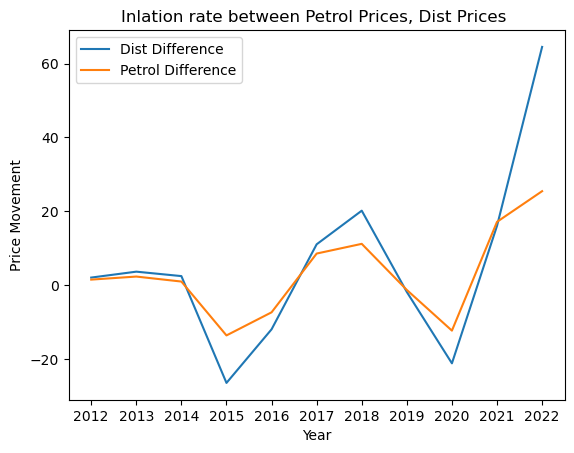

In [10]:
# Plot the line graph
ax = pricing_df.plot(x='Year', y=['Dist Difference', 'Petrol Difference'], kind='line')

ax.set_xticks(pricing_df['Year'])
ax.set_xticklabels(pricing_df['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price Movement')
plt.title('Inlation rate between Petrol Prices, Dist Prices ')

# Show the plot
plt.show()

In [11]:
#merge two dataframes first 

fuel_inflation = pd.merge(fuel_df1,inflation_df,  left_index=True, right_index=True)
fuel_inflation=fuel_inflation.drop(columns=['Date_inflation'])
fuel_inflation

NameError: name 'fuel_df1' is not defined

In [ ]:
##cost of fuel movement vs inflation
#changing date to match 
# Plot the line graph
ax = fuel_inflation.plot(x='Year', y=['Value_inflation', 'Exchange rate movement'], kind='line')

ax.set_xticks(fuel_inflation['Year'])
ax.set_xticklabels(fuel_inflation['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between Viva Movement,and Inflation')

# Show the plot
plt.show()

In [ ]:
fuel_csv2 = Path("Resources/Fuel pricing/Australian Petroleum Statistics -.csv")
fuel_pricingdata1 = pd.read_csv(fuel_csv2,usecols=['Month','Diesel oil total (ML)'],skiprows=[])
fuel_pricingdata1=fuel_pricingdata1.dropna()

# Convert the 'Diesel oil total (ML)' column to numeric
fuel_pricingdata1['Diesel oil total (ML)'] = pd.to_numeric(fuel_pricingdata1['Diesel oil total (ML)'], errors='coerce')

fuel_pricingdata1['Year'] = pd.to_datetime(fuel_pricingdata1['Month'], format='mixed').dt.year
grouped_fueldata = fuel_pricingdata1.groupby('Year')
average_liters = grouped_fueldata['Diesel oil total (ML)'].mean()
perc_liters=average_liters*100
df_average_liters = perc_liters.reset_index()
df_average_liters

In [ ]:
#merge sheets together 
data_df = pd.merge(df_average_liters, fuel_pricingdata, left_on='Year', right_on='Date_inflation')

In [ ]:
#fuel_data['DATE'] = pd.to_datetime(fuel_data['DATE'], format='%d/%m/%Y')
fuel_data= fuel_data.sort_values('DATE')
fuel_data

In [ ]:
#clean data 
fuel_dropcol=fuel_data.drop(columns=['CHANGE','Unnamed: 12','Unnamed: 13','Unnamed: 14', 'Unnamed: 15','Unnamed: 16'])
fuel_dropnan=fuel_dropcol.dropna()
fuel_dropnan

In [ ]:
#renaming COLUMN HEADERS 
fuel_df=fuel_dropnan.rename(columns={"DATE": "Date","Up/Down": "Brent Movement",
                                         "Up/Down.1": "Exchange rate movement","Change": "RSGG Change",
                                         })

fuel_df

In [ ]:
viva_move=fuel_df['Viva Movement'] = fuel_df['VIVA TGP'].diff()

fuel_df

In [ ]:
fuel_df['year'] = fuel_df['Date'].dt.year
fuel_df

In [ ]:
years = [2018,2019,2020,2021, 2022, 2023]  # List of years
averages = []
for year in years:
    condition = fuel_df['year'] == year
    average = fuel_df.loc[condition, 'Viva Movement'].mean()
    perc_viva=average*100
    averages.append({'Year': year, 'Viva Movement': perc_viva})

df_averages = pd.DataFrame(averages)
df_averages

In [ ]:
# Convert the 'Exchange Rate' column to numeric
fuel_df['Exchange rate movement'] = pd.to_numeric(fuel_df['Exchange rate movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data = fuel_df.groupby('year')

# Calculate the average exchange rate for each year
average_exchange_rate = grouped_data['Exchange rate movement'].mean()
perc=average_exchange_rate*100

# Convert the grouped data to a DataFrame
df_average_exchange_rate = perc.reset_index()

# Print the DataFrame
df_average_exchange_rate

In [ ]:
# Convert the 'Exchange Rate' column to numeric
fuel_df['Brent Movement'] = pd.to_numeric(fuel_df['Brent Movement'], errors='coerce')

# Group the exchange rate data by year
grouped_data_brent = fuel_df.groupby('year')

# Calculate the average exchange rate for each year
average_brent = grouped_data_brent['Brent Movement'].mean()
perc=average_brent*100

# Convert the grouped data to a DataFrame
df_average_brent = perc.reset_index()

# Print the DataFrame
df_average_brent

In [ ]:
merged_df = pd.merge(df_averages, df_average_exchange_rate, left_index=True, right_index=True)
merged_df

In [ ]:
fuel_df1 = pd.merge(merged_df, df_average_brent, left_index=True, right_index=True)
fuel_df1=fuel_df1.drop(columns=['year_x','year_y'])
fuel_df1

In [ ]:


# Plot the line graph
ax = fuel_df1.plot(x='Year', y=['Viva Movement', 'Exchange rate movement', 'Brent Movement'], kind='line')

ax.set_xticks(fuel_df1['Year'])
ax.set_xticklabels(fuel_df1['Year'].astype(int))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value %')
plt.title('Annual comparison between Brent Movement, The Exchange Rate and Viva Movement')

# Show the plot
plt.show()